In [1]:
#import packages and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data_load_data 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import ClusterCentroids
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

mitbih_test = data_load_data.load_dataframe("test")
mitbih_train = data_load_data.load_dataframe("train")
ptbdb_abnormal = data_load_data.load_dataframe("abnormal")
ptbdb_normal = data_load_data.load_dataframe("normal")

#rename columns

for df in [ptbdb_abnormal, ptbdb_normal, mitbih_test, mitbih_train]:
    df.columns = [i for i in range(len(df.columns))]

#combine datasets, remove class 4, combine classes 1,2,3

ptbdb = pd.concat([ptbdb_abnormal, ptbdb_normal])
mitbih = pd.concat([mitbih_train, mitbih_test])

mitbih_recoded = mitbih.loc[mitbih[187] != 4]
mitbih_recoded.loc[:, 187] = mitbih_recoded[187].replace([1,2,3], 1)

df_total = pd.concat([mitbih_recoded, ptbdb])

#split into train and test

X = df_total.drop(187, axis=1)
y = df_total[187]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

c:\Users\maxjj\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8484 - loss: 0.3882 - val_accuracy: 0.8846 - val_loss: 0.2931
Epoch 2/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8823 - loss: 0.3062 - val_accuracy: 0.9050 - val_loss: 0.2499
Epoch 3/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8958 - loss: 0.2690 - val_accuracy: 0.9144 - val_loss: 0.2188
Epoch 4/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9048 - loss: 0.2481 - val_accuracy: 0.9180 - val_loss: 0.2113
Epoch 5/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9121 - loss: 0.2328 - val_accuracy: 0.9304 - val_loss: 0.1841
Epoch 6/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9175 - loss: 0.2182 - val_accuracy: 0.9338 - val_loss: 0.1803
Epoch 7/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9223 - loss: 0.2081 - val_accuracy: 0.9375 - val_loss: 0.1642
Epoch 8/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9254 - loss: 0

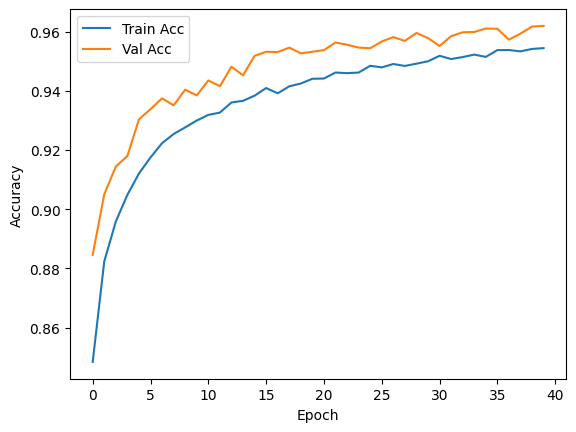

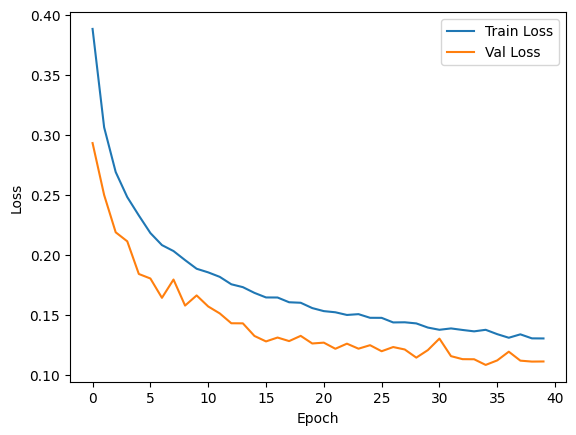

2899/2899 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9697 - loss: 0.0838
[0.08382251858711243, 0.9697080850601196]
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9621 - loss: 0.1077
[0.10765811055898666, 0.9620973467826843]


In [10]:
# build MLP model sequentially; Dense layers: [512, 256, 128, 64, 36], activation: relu, dropout layers: Dropout(0.4) after each layer
# output activation: sigmoid
# epochs 50


model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(187,)))
model.add(Dropout(0.4))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

#compile model

model.compile(loss="binary_crossentropy", #loss function for binary classification
              optimizer="adam",
              metrics=["accuracy"])

early_stop = EarlyStopping(monitor='val_loss',  #if no improvement in val_loss after 5 epochs, stop and keep best model
                           patience=5,         
                           restore_best_weights=True)  

#train model

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

#make prediction on test set

test_pred = model.predict(X_test) #returns array of probabilities of belonging to class 1

y_test_class = y_test
y_pred_class = (test_pred > 0.5) # returns boolean array, True if probability of belonging to class 1 > 0.5, False otherwise

#evaluate model

print(classification_report(y_test_class, y_pred_class))

#visualise loss and accuracy evolution for training and validation sets

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#evaluate on training set

print(model.evaluate(X_train, y_train))

#evaluate on test set

print(model.evaluate(X_test, y_test))

Epoch 1/50


c:\Users\maxjj\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2609/2609 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8857 - loss: 0.2923 - val_accuracy: 0.9069 - val_loss: 0.2378
Epoch 2/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9294 - loss: 0.1876 - val_accuracy: 0.9356 - val_loss: 0.1740
Epoch 3/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9463 - loss: 0.1464 - val_accuracy: 0.9453 - val_loss: 0.1464
Epoch 4/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9540 - loss: 0.1252 - val_accuracy: 0.9538 - val_loss: 0.1248
Epoch 5/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9607 - loss: 0.1097 - val_accuracy: 0.9489 - val_loss: 0.1294
Epoch 6/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9642 - loss: 0.0993 - val_accuracy: 0.9575 - val_loss: 0.1215
Epoch 7/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9676 - loss: 0.0899 - val_accuracy: 0.9624 - val_loss: 0.1065
Epoch 8/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9702 - loss: 0.0831 - val

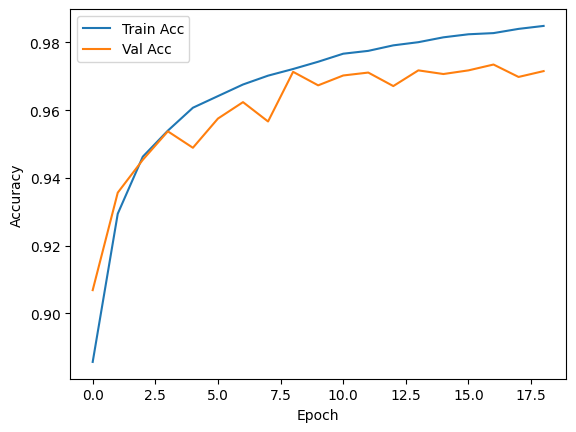

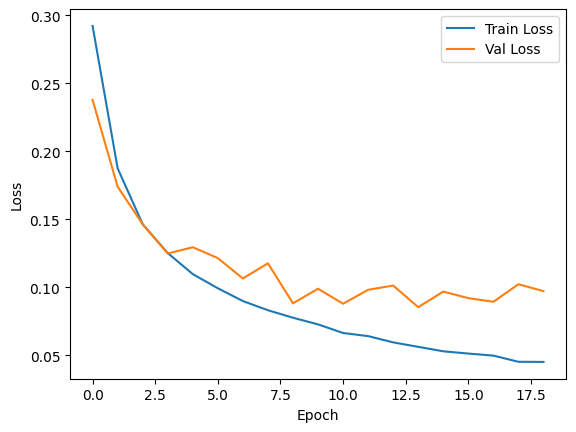

2899/2899 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9839 - loss: 0.0487
[0.04872608929872513, 0.9839053750038147]
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9719 - loss: 0.0880
[0.08801040053367615, 0.971885621547699]


In [11]:
# build MLP model sequentially; Dense layers: [512, 256, 128, 64, 36], activation: relu, dropout layers: none
# output activation: sigmoid
# epochs 50

model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(187,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

#compile model

model.compile(loss="binary_crossentropy", #loss function for binary classification
              optimizer="adam",
              metrics=["accuracy"])

early_stop = EarlyStopping(monitor='val_loss',  #if no improvement in val_loss after 5 epochs, stop and keep best model
                           patience=5,         
                           restore_best_weights=True)  

#train model

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

#make prediction on test set

test_pred = model.predict(X_test) #returns array of probabilities of belonging to class 1

y_test_class = y_test
y_pred_class = (test_pred > 0.5) # returns boolean array, True if probability of belonging to class 1 > 0.5, False otherwise

#evaluate model

print(classification_report(y_test_class, y_pred_class))

#visualise loss and accuracy evolution for training and validation sets

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#evaluate on training set

print(model.evaluate(X_train, y_train))

#evaluate on test set

print(model.evaluate(X_test, y_test))

Epoch 1/50


c:\Users\maxjj\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2609/2609 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8862 - loss: 0.2881 - val_accuracy: 0.9162 - val_loss: 0.2191
Epoch 2/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9296 - loss: 0.1834 - val_accuracy: 0.9379 - val_loss: 0.1643
Epoch 3/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9470 - loss: 0.1427 - val_accuracy: 0.9469 - val_loss: 0.1408
Epoch 4/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9557 - loss: 0.1214 - val_accuracy: 0.9557 - val_loss: 0.1258
Epoch 5/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9612 - loss: 0.1064 - val_accuracy: 0.9567 - val_loss: 0.1238
Epoch 6/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9664 - loss: 0.0945 - val_accuracy: 0.9619 - val_loss: 0.1094
Epoch 7/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9690 - loss: 0.0850 - val_accuracy: 0.9635 - val_loss: 0.0976
Epoch 8/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9719 - loss: 0.0780 - val

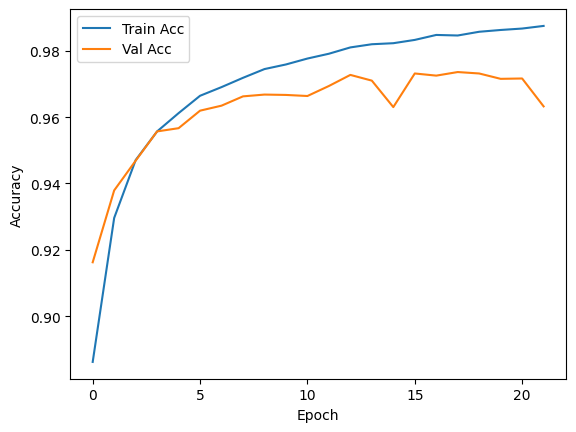

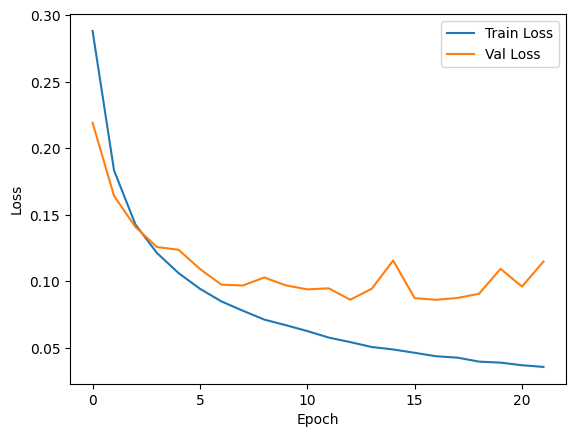

2899/2899 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9866 - loss: 0.0400
[0.03996885195374489, 0.9866435527801514]
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9727 - loss: 0.0881
[0.08808448910713196, 0.9727480411529541]


In [12]:
# build MLP model sequentially; Dense layers: [512, 256, 128], activation: relu, dropout layers: none
# output activation: sigmoid
# epochs 50

model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(187,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

#compile model

model.compile(loss="binary_crossentropy", #loss function for binary classification
              optimizer="adam",
              metrics=["accuracy"])

early_stop = EarlyStopping(monitor='val_loss',  #if no improvement in val_loss after 5 epochs, stop and keep best model
                           patience=5,         
                           restore_best_weights=True)  

#train model

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

#make prediction on test set

test_pred = model.predict(X_test) #returns array of probabilities of belonging to class 1

y_test_class = y_test
y_pred_class = (test_pred > 0.5) # returns boolean array, True if probability of belonging to class 1 > 0.5, False otherwise

#evaluate model

print(classification_report(y_test_class, y_pred_class))

#visualise loss and accuracy evolution for training and validation sets

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#evaluate on training set

print(model.evaluate(X_train, y_train))

#evaluate on test set

print(model.evaluate(X_test, y_test))

Epoch 1/50


c:\Users\maxjj\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8636 - loss: 0.3512 - val_accuracy: 0.8946 - val_loss: 0.2679
Epoch 2/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8907 - loss: 0.2798 - val_accuracy: 0.9051 - val_loss: 0.2336
Epoch 3/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9044 - loss: 0.2457 - val_accuracy: 0.9168 - val_loss: 0.2094
Epoch 4/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9125 - loss: 0.2262 - val_accuracy: 0.9250 - val_loss: 0.1919
Epoch 5/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9203 - loss: 0.2092 - val_accuracy: 0.9328 - val_loss: 0.1738
Epoch 6/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9258 - loss: 0.1969 - val_accuracy: 0.9370 - val_loss: 0.1634
Epoch 7/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9276 - loss: 0.1875 - val_accuracy: 0.9434 - val_loss: 0.1529
Epoch 8/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9329 - loss: 0.1786 - val

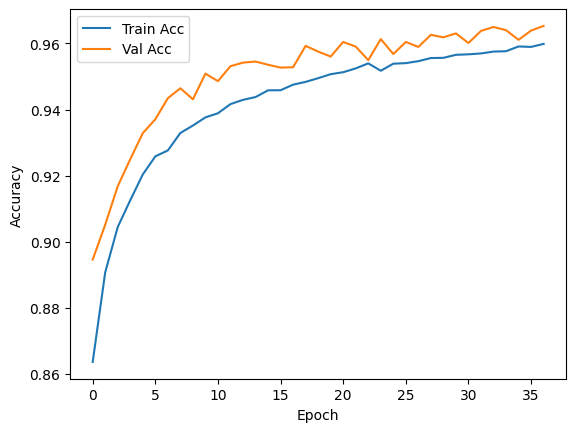

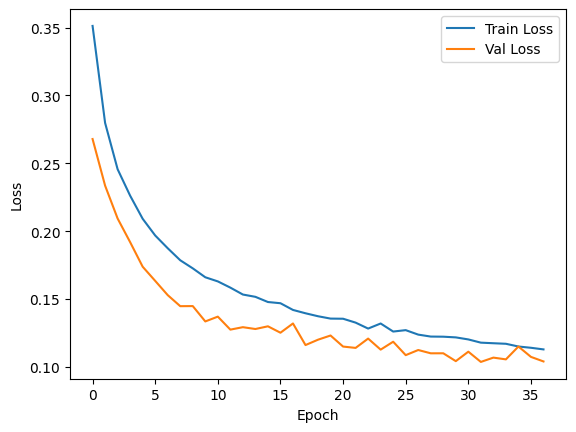

2899/2899 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9736 - loss: 0.0764
[0.0763876885175705, 0.9736320376396179]
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9657 - loss: 0.1008
[0.100814089179039, 0.96571946144104]


In [13]:
# build MLP model sequentially; Dense layers: [512, 256, 128], activation: relu, dropout layers: Dropout(0.4) after each layer
# output activation: sigmoid
# epochs 50

model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(187,)))
model.add(Dropout(0.4))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

#compile model

model.compile(loss="binary_crossentropy", #loss function for binary classification
              optimizer="adam",
              metrics=["accuracy"])

early_stop = EarlyStopping(monitor='val_loss',  #if no improvement in val_loss after 5 epochs, stop and keep best model
                           patience=5,         
                           restore_best_weights=True)  

#train model

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

#make prediction on test set

test_pred = model.predict(X_test) #returns array of probabilities of belonging to class 1

y_test_class = y_test
y_pred_class = (test_pred > 0.5) # returns boolean array, True if probability of belonging to class 1 > 0.5, False otherwise

#evaluate model

print(classification_report(y_test_class, y_pred_class))

#visualise loss and accuracy evolution for training and validation sets

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#evaluate on training set

print(model.evaluate(X_train, y_train))

#evaluate on test set

print(model.evaluate(X_test, y_test))

c:\Users\maxjj\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8492 - loss: 0.3871 - val_accuracy: 0.8662 - val_loss: 0.3321
Epoch 2/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8749 - loss: 0.3211 - val_accuracy: 0.8911 - val_loss: 0.2724
Epoch 3/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8857 - loss: 0.2901 - val_accuracy: 0.9040 - val_loss: 0.2458
Epoch 4/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8923 - loss: 0.2704 - val_accuracy: 0.9111 - val_loss: 0.2229
Epoch 5/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8973 - loss: 0.2582 - val_accuracy: 0.9113 - val_loss: 0.2205
Epoch 6/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9011 - loss: 0.2504 - val_accuracy: 0.9169 - val_loss: 0.2034
Epoch 7/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9066 - loss: 0.2388 - val_accuracy: 0.9210 - val_loss: 0.1971
Epoch 8/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9070 - loss: 0.2338 - 

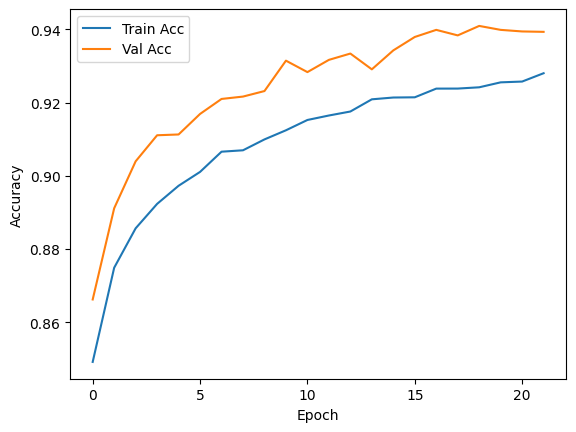

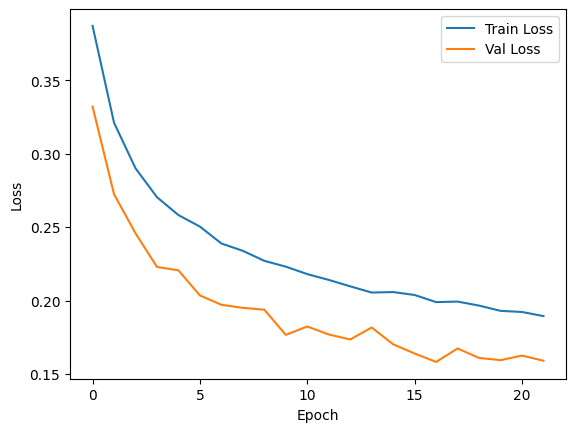

2899/2899 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9486 - loss: 0.1414
[0.14140979945659637, 0.9486438632011414]
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9460 - loss: 0.1526
[0.1526058167219162, 0.9460135102272034]


In [14]:
# build MLP model sequentially; Dense layers: [128, 64, 32], activation: relu, dropout layers: Dropout(0.4) after each layer
# output activation: sigmoid
# epochs 50

model = Sequential()

model.add(Dense(units=128, activation='relu', input_shape=(187,)))
model.add(Dropout(0.4))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

#compile model

model.compile(loss="binary_crossentropy", #loss function for binary classification
              optimizer="adam",
              metrics=["accuracy"])

early_stop = EarlyStopping(monitor='val_loss',  #if no improvement in val_loss after 5 epochs, stop and keep best model
                           patience=5,         
                           restore_best_weights=True)  

#train model

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

#make prediction on test set

test_pred = model.predict(X_test) #returns array of probabilities of belonging to class 1

y_test_class = y_test
y_pred_class = (test_pred > 0.5) # returns boolean array, True if probability of belonging to class 1 > 0.5, False otherwise

#evaluate model

print(classification_report(y_test_class, y_pred_class))

#visualise loss and accuracy evolution for training and validation sets

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#evaluate on training set

print(model.evaluate(X_train, y_train))

#evaluate on test set

print(model.evaluate(X_test, y_test))

Epoch 1/50


c:\Users\maxjj\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2609/2609 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8846 - loss: 0.2958 - val_accuracy: 0.9050 - val_loss: 0.2324
Epoch 2/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9215 - loss: 0.2037 - val_accuracy: 0.9279 - val_loss: 0.1883
Epoch 3/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9370 - loss: 0.1668 - val_accuracy: 0.9363 - val_loss: 0.1673
Epoch 4/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9459 - loss: 0.1469 - val_accuracy: 0.9429 - val_loss: 0.1556
Epoch 5/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9521 - loss: 0.1309 - val_accuracy: 0.9453 - val_loss: 0.1454
Epoch 6/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9568 - loss: 0.1193 - val_accuracy: 0.9539 - val_loss: 0.1237
Epoch 7/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9605 - loss: 0.1091 - val_accuracy: 0.9529 - val_loss: 0.1272
Epoch 8/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9633 - loss: 0.1013 - val_accurac

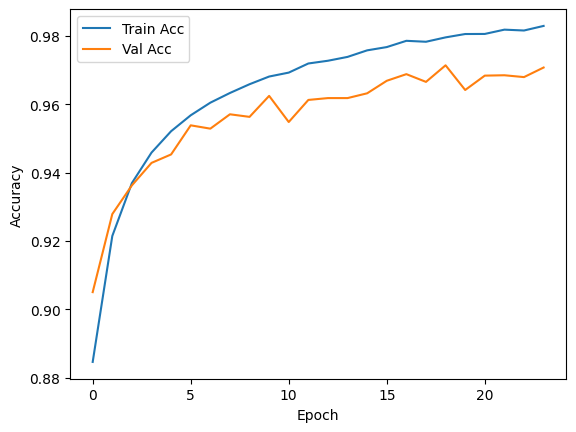

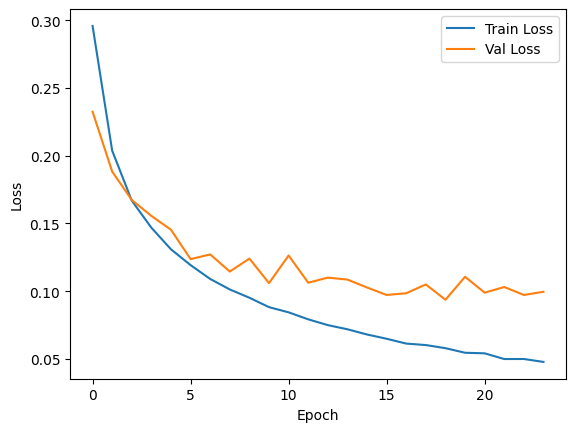

2899/2899 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9821 - loss: 0.0516
[0.051618192344903946, 0.9820835590362549]
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.0952
[0.09515200555324554, 0.9704626798629761]


In [15]:
# build MLP model sequentially; Dense layers: [128, 64, 32], activation: relu, dropout layers: none
# output activation: sigmoid
# epochs 50

model = Sequential()

model.add(Dense(units=128, activation='relu', input_shape=(187,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

#compile model

model.compile(loss="binary_crossentropy", #loss function for binary classification
              optimizer="adam",
              metrics=["accuracy"])

early_stop = EarlyStopping(monitor='val_loss',  #if no improvement in val_loss after 5 epochs, stop and keep best model
                           patience=5,         
                           restore_best_weights=True)  

#train model

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

#make prediction on test set

test_pred = model.predict(X_test) #returns array of probabilities of belonging to class 1

y_test_class = y_test
y_pred_class = (test_pred > 0.5) # returns boolean array, True if probability of belonging to class 1 > 0.5, False otherwise

#evaluate model

print(classification_report(y_test_class, y_pred_class))

#visualise loss and accuracy evolution for training and validation sets

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#evaluate on training set

print(model.evaluate(X_train, y_train))

#evaluate on test set

print(model.evaluate(X_test, y_test))

c:\Users\maxjj\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8631 - loss: 0.3550 - val_accuracy: 0.8899 - val_loss: 0.2790
Epoch 2/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8897 - loss: 0.2825 - val_accuracy: 0.9069 - val_loss: 0.2273
Epoch 3/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9044 - loss: 0.2457 - val_accuracy: 0.9203 - val_loss: 0.2035
Epoch 4/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9141 - loss: 0.2225 - val_accuracy: 0.9307 - val_loss: 0.1823
Epoch 5/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9203 - loss: 0.2083 - val_accuracy: 0.9337 - val_loss: 0.1766
Epoch 6/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9246 - loss: 0.1991 - val_accuracy: 0.9261 - val_loss: 0.1838
Epoch 7/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9288 - loss: 0.1878 - val_accuracy: 0.9405 - val_loss: 0.1586
Epoch 8/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9338 - loss: 0

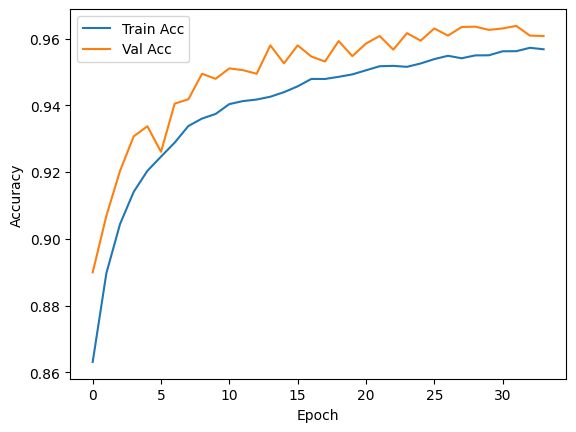

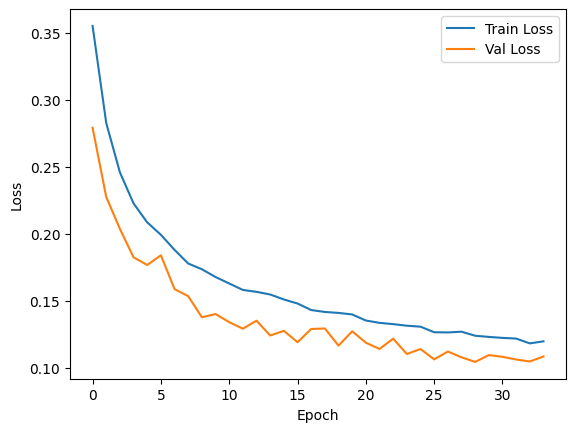

2899/2899 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9717 - loss: 0.0808
[0.08076849579811096, 0.971659243106842]
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9642 - loss: 0.1048
[0.10480696707963943, 0.9642102718353271]


In [24]:
# build MLP model sequentially; Dense layers: [512, 256, 128], activation: relu, dropout layers: Dropout(0.4) after each layer
# output activation: softmax
# epochs 50

#one hot encode target
from tensorflow.keras.utils import to_categorical
y_train_enc = to_categorical(y_train, num_classes=2)
y_test_enc = to_categorical(y_test, num_classes=2)

model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(187,)))
model.add(Dropout(0.4))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=2, activation='softmax'))

#compile model

model.compile(loss="categorical_crossentropy", #loss function for binary classification with softmax
              optimizer="adam",
              metrics=["accuracy"])

early_stop = EarlyStopping(monitor='val_loss',  #if no improvement in val_loss after 5 epochs, stop and keep best model
                           patience=5,         
                           restore_best_weights=True)  

#train model

history = model.fit(X_train, y_train_enc, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

#make prediction on test set

test_pred = model.predict(X_test) #returns 2D array, each row containing probability of belonging to class 0 and class 1

y_test_class = np.argmax(y_test_enc, axis=1)
y_pred_class = np.argmax(test_pred, axis=1) # returns predicted class

#evaluate model

print(classification_report(y_test_class, y_pred_class))

#visualise loss and accuracy evolution for training and validation sets

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#evaluate on training set

print(model.evaluate(X_train, y_train_enc))

#evaluate on test set

print(model.evaluate(X_test, y_test_enc))

c:\Users\maxjj\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.8433 - loss: 0.4171 - val_accuracy: 0.8681 - val_loss: 0.3769
Epoch 2/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.8668 - loss: 0.3685 - val_accuracy: 0.8800 - val_loss: 0.3297
Epoch 3/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.8773 - loss: 0.3388 - val_accuracy: 0.8895 - val_loss: 0.3058
Epoch 4/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8838 - loss: 0.3179 - val_accuracy: 0.8927 - val_loss: 0.2873
Epoch 5/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8870 - loss: 0.3072 - val_accuracy: 0.8974 - val_loss: 0.2715
Epoch 6/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.8913 - loss: 0.2946 - val_accuracy: 0.8999 - val_loss: 0.2559
Epoch 7/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - accuracy: 0.8943 - loss: 0.2812 - val_accuracy: 0.9007 - val_loss: 0.2657
Epoch 8/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.8962 -

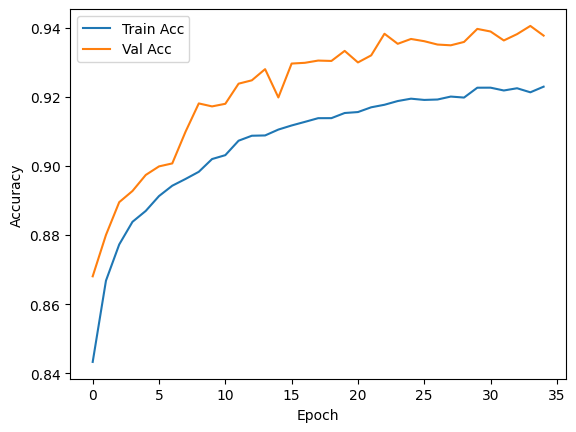

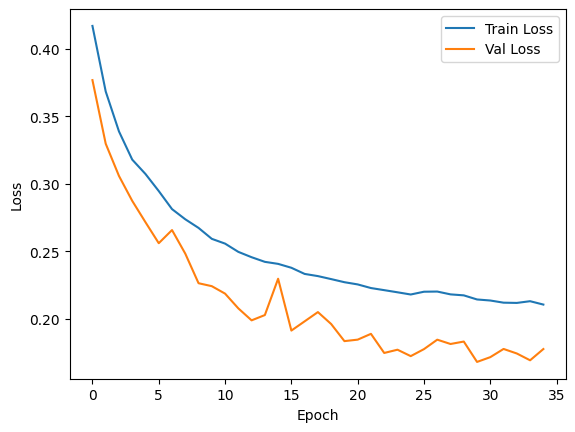

2899/2899 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9434 - loss: 0.1607
[0.16074734926223755, 0.9433616399765015]
725/725 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9417 - loss: 0.1664
[0.16637936234474182, 0.9417015314102173]


In [2]:
# build MLP model sequentially; Dense layers: [512, 256, 128, 64, 36], activation: tanh, dropout layers: Dropout(0.4) after each layer
# output activation: sigmoid
# epochs 50


model = Sequential()

model.add(Dense(units=512, activation='tanh', input_shape=(187,)))
model.add(Dropout(0.4))
model.add(Dense(units=256, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(units=64, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

#compile model

model.compile(loss="binary_crossentropy", #loss function for binary classification
              optimizer="adam",
              metrics=["accuracy"])

early_stop = EarlyStopping(monitor='val_loss',  #if no improvement in val_loss after 5 epochs, stop and keep best model
                           patience=5,         
                           restore_best_weights=True)  

#train model

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

#make prediction on test set

test_pred = model.predict(X_test) #returns array of probabilities of belonging to class 1

y_test_class = y_test
y_pred_class = (test_pred > 0.5) # returns boolean array, True if probability of belonging to class 1 > 0.5, False otherwise

#evaluate model

print(classification_report(y_test_class, y_pred_class))

#visualise loss and accuracy evolution for training and validation sets

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#evaluate on training set

print(model.evaluate(X_train, y_train))

#evaluate on test set

print(model.evaluate(X_test, y_test))

c:\Users\maxjj\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8500 - loss: 0.3922 - val_accuracy: 0.8798 - val_loss: 0.3252
Epoch 2/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.8753 - loss: 0.3287 - val_accuracy: 0.8912 - val_loss: 0.2799
Epoch 3/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8874 - loss: 0.2961 - val_accuracy: 0.9005 - val_loss: 0.2557
Epoch 4/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8952 - loss: 0.2716 - val_accuracy: 0.9071 - val_loss: 0.2454
Epoch 5/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9020 - loss: 0.2538 - val_accuracy: 0.9164 - val_loss: 0.2125
Epoch 6/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9073 - loss: 0.2410 - val_accuracy: 0.9200 - val_loss: 0.2042
Epoch 7/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9117 - loss: 0.2308 - val_accuracy: 0.9291 - val_loss: 0.1853
Epoch 8/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9150 - loss:

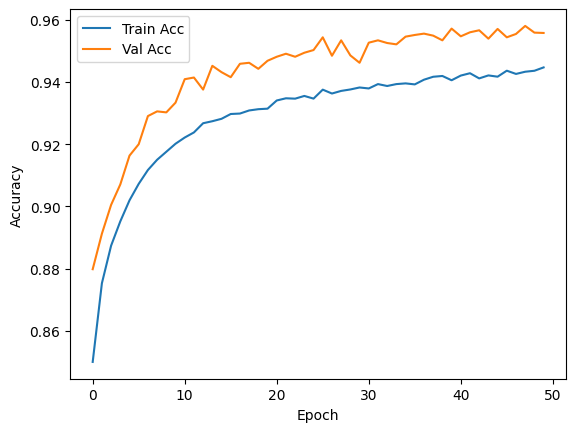

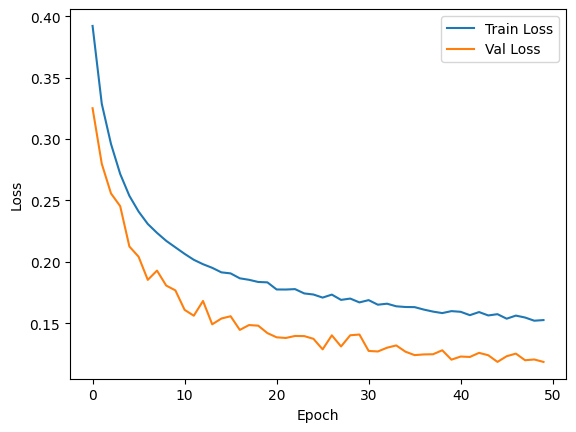

2899/2899 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9630 - loss: 0.1026
[0.10258941352367401, 0.9629705548286438]
725/725 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9594 - loss: 0.1162
[0.11615574359893799, 0.9593808054924011]


In [3]:
# build MLP model sequentially; Dense layers: [512, 256, 128], activation: tanh, dropout layers: Dropout(0.4) after each layer
# output activation: sigmoid
# epochs 50

model = Sequential()

model.add(Dense(units=512, activation='tanh', input_shape=(187,)))
model.add(Dropout(0.4))
model.add(Dense(units=256, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

#compile model

model.compile(loss="binary_crossentropy", #loss function for binary classification
              optimizer="adam",
              metrics=["accuracy"])

early_stop = EarlyStopping(monitor='val_loss',  #if no improvement in val_loss after 5 epochs, stop and keep best model
                           patience=5,         
                           restore_best_weights=True)  

#train model

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

#make prediction on test set

test_pred = model.predict(X_test) #returns array of probabilities of belonging to class 1

y_test_class = y_test
y_pred_class = (test_pred > 0.5) # returns boolean array, True if probability of belonging to class 1 > 0.5, False otherwise

#evaluate model

print(classification_report(y_test_class, y_pred_class))

#visualise loss and accuracy evolution for training and validation sets

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#evaluate on training set

print(model.evaluate(X_train, y_train))

#evaluate on test set

print(model.evaluate(X_test, y_test))

c:\Users\maxjj\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8422 - loss: 0.4116 - val_accuracy: 0.8656 - val_loss: 0.3652
Epoch 2/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8603 - loss: 0.3722 - val_accuracy: 0.8701 - val_loss: 0.3550
Epoch 3/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8658 - loss: 0.3560 - val_accuracy: 0.8786 - val_loss: 0.3246
Epoch 4/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8717 - loss: 0.3416 - val_accuracy: 0.8732 - val_loss: 0.3232
Epoch 5/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8755 - loss: 0.3284 - val_accuracy: 0.8920 - val_loss: 0.2885
Epoch 6/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8775 - loss: 0.3179 - val_accuracy: 0.8964 - val_loss: 0.2769
Epoch 7/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.8827 - loss: 0.3090 - val_accuracy: 0.8978 - val_loss: 0.2729
Epoch 8/50
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.8839 - loss: 

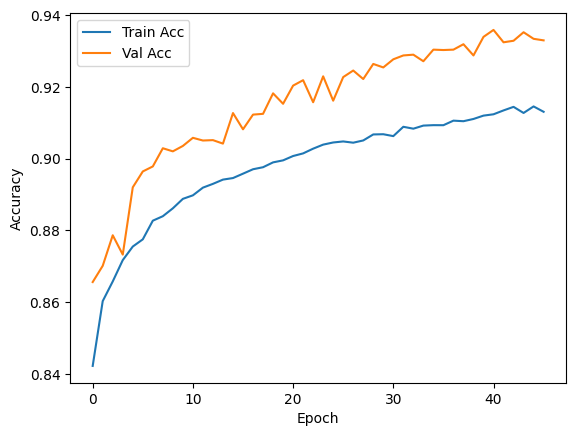

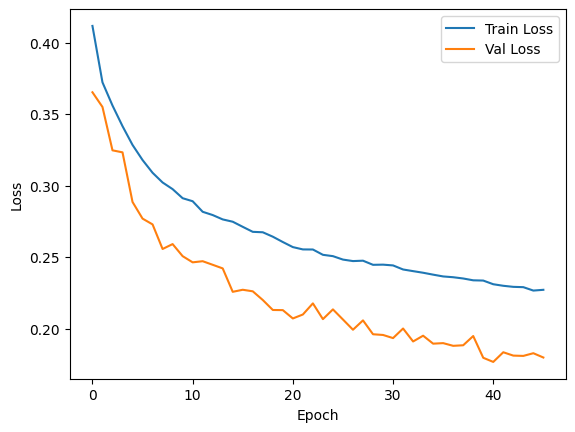

2899/2899 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9391 - loss: 0.1683
[0.1682688295841217, 0.9390819668769836]
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9372 - loss: 0.1762
[0.17624573409557343, 0.9371739029884338]


In [4]:
# build MLP model sequentially; Dense layers: [128, 64, 32], activation: tanh, dropout layers: Dropout(0.4) after each layer
# output activation: sigmoid
# epochs 50

model = Sequential()

model.add(Dense(units=128, activation='tanh', input_shape=(187,)))
model.add(Dropout(0.4))
model.add(Dense(units=64, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

#compile model

model.compile(loss="binary_crossentropy", #loss function for binary classification
              optimizer="adam",
              metrics=["accuracy"])

early_stop = EarlyStopping(monitor='val_loss',  #if no improvement in val_loss after 5 epochs, stop and keep best model
                           patience=5,         
                           restore_best_weights=True)  

#train model

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

#make prediction on test set

test_pred = model.predict(X_test) #returns array of probabilities of belonging to class 1

y_test_class = y_test
y_pred_class = (test_pred > 0.5) # returns boolean array, True if probability of belonging to class 1 > 0.5, False otherwise

#evaluate model

print(classification_report(y_test_class, y_pred_class))

#visualise loss and accuracy evolution for training and validation sets

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#evaluate on training set

print(model.evaluate(X_train, y_train))

#evaluate on test set

print(model.evaluate(X_test, y_test))